## 🛌 Sleep Health and Lifestyle Analysis
In this project, I analyzed the Sleep Health and Lifestyle Dataset from Kaggle, which includes 400 records and 13 variables related to individuals' sleep behavior and daily habits.

The dataset provides rich information such as:

Demographics: Age, Gender, Occupation

Health Metrics: BMI Category, Blood Pressure, Heart Rate

Lifestyle Factors: Physical Activity Level, Daily Steps, Stress Level

Sleep Data: Sleep Duration, Quality of Sleep, and Sleep Disorder status (None, Insomnia, or Sleep Apnea)

## 🔍 Project Objective
The goal of this analysis is to:

Explore patterns and correlations between sleep disorders and factors like stress, BMI, physical activity, and occupation.

Perform data cleaning and exploratory data analysis (EDA) to understand key trends.

Prepare the dataset for potential predictive modeling in future steps (e.g., predicting sleep disorder risk).

## 🧰 Tools & Techniques Used
Python Libraries: pandas, seaborn, matplotlib, numpy

Analysis Methods: Descriptive statistics, correlation analysis, visualization

This project serves as both a practical application of Python-based data analysis and a foundation for further healthcare analytics focused on sleep and lifestyle.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\wasee\OneDrive\Desktop\sleep_health_and_lifestyle_dataset-sleep_health_and_lifestyle_dataset.csv")
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
df['Physical Activity Level'].mean()



60

In [7]:
df['Physical Activity Level'].median()


60.0

In [6]:
df['Physical Activity Level'].mode()[0]

60

In [20]:
from scipy.stats import ttest_ind, ttest_1samp, ttest_rel, f_oneway, chi2_contingency, shapiro
from sklearn.linear_model import LinearRegression, LogisticRegression


In [23]:
from scipy.stats import shapiro, probplot
import seaborn as sns
import matplotlib.pyplot as plt

def check_normality(series, alpha=0.05):
    # Histogram + KDE
    plt.figure(figsize=(14, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(series, kde=True, bins=20, color='skyblue')
    plt.title("Histogram + KDE")

    # Q-Q Plot
    plt.subplot(1, 2, 2)
    probplot(series, dist="norm", plot=plt)
    plt.title("Q-Q Plot")
    plt.tight_layout()
    plt.show()

    # Shapiro-Wilk Test
    stat, p_val = shapiro(series)
    print(f"Shapiro-Wilk Test p-value: {p_val:.4f}")
    if p_val > alpha:
        print("✅ Normally distributed")
    else:
        print("❌ Not normally distributed")


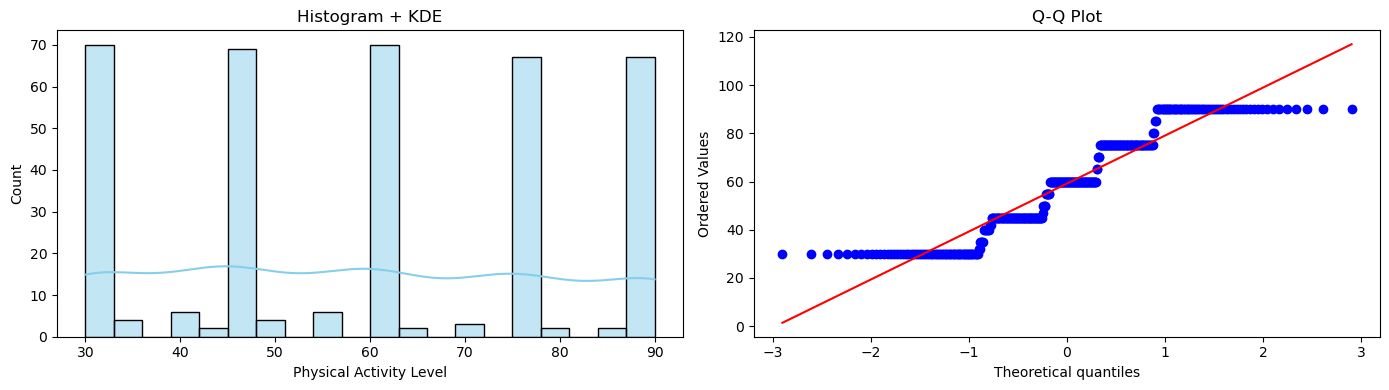

Shapiro-Wilk Test p-value: 0.0000
❌ Not normally distributed


In [25]:
check_normality(df['Physical Activity Level'], alpha=0.05);

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, probplot, kurtosis, skew

def descriptive_report(series, alpha=0.05):
    print("📊 Descriptive Statistics:")
    print(f"- Count: {series.count()}")
    print(f"- Mean: {series.mean():.2f}")
    print(f"- Median: {series.median():.2f}")
    print(f"- Mode: {series.mode().iloc[0]}")
    print(f"- Std Dev: {series.std():.2f}")
    print(f"- Min: {series.min()}")
    print(f"- Max: {series.max()}")
    print(f"- Range: {series.max() - series.min()}")
    print(f"- Skewness: {skew(series):.2f}")
    print(f"- Kurtosis: {kurtosis(series):.2f}")

    print("\n🧪 Normality Test (Shapiro-Wilk):")
    stat, p_val = shapiro(series)
    print(f"  ➤ p-value = {p_val:.4f}")
    print("  ✅ Data is normally distributed" if p_val > alpha else "  ❌ Data is NOT normally distributed")

    # Plots
    plt.figure(figsize=(14, 4))

    # Histogram + KDE
    plt.subplot(1, 2, 1)
    sns.histplot(series, kde=True, bins=20, color='skyblue')
    plt.title("Histogram + KDE")

    # Q-Q Plot
    plt.subplot(1, 2, 2)
    probplot(series, dist="norm", plot=plt)
    plt.title("Q-Q Plot")

    plt.tight_layout()
    plt.show()


📊 Descriptive Statistics:
- Count: 374
- Mean: 6816.84
- Median: 7000.00
- Mode: 8000
- Std Dev: 1617.92
- Min: 3000
- Max: 10000
- Range: 7000
- Skewness: 0.18
- Kurtosis: -0.40

🧪 Normality Test (Shapiro-Wilk):
  ➤ p-value = 0.0000
  ❌ Data is NOT normally distributed


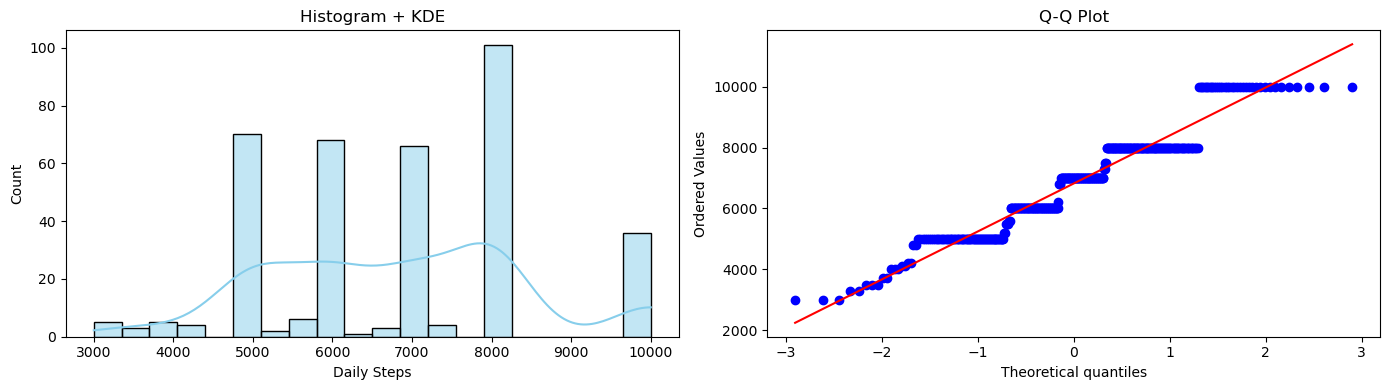

In [28]:
descriptive_report(df['Daily Steps'], alpha=0.05)

📊 Descriptive Statistics:
- Count: 374
- Mean: 70.17
- Median: 70.00
- Mode: 68
- Std Dev: 4.14
- Min: 65
- Max: 86
- Range: 21
- Skewness: 1.22
- Kurtosis: 2.24

🧪 Normality Test (Shapiro-Wilk):
  ➤ p-value = 0.0000
  ❌ Data is NOT normally distributed


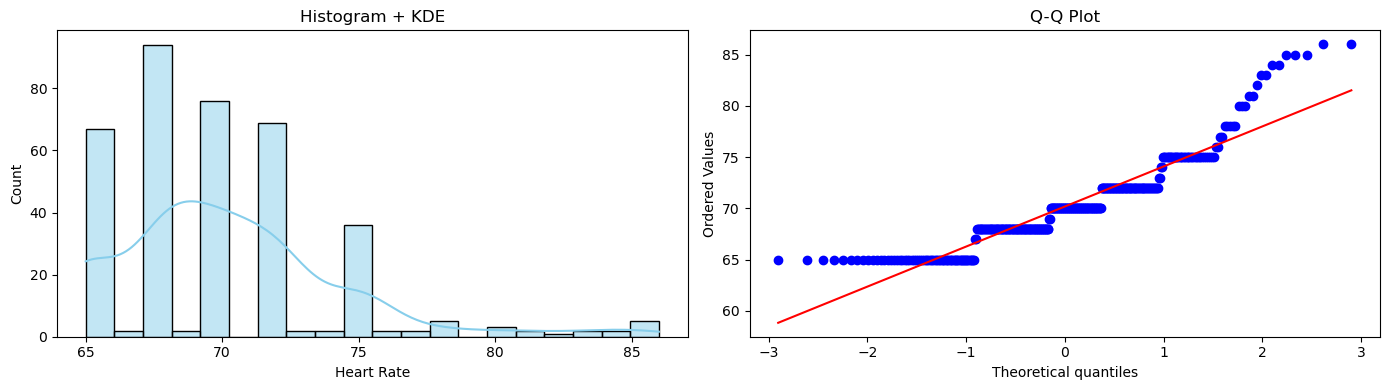

In [29]:
descriptive_report(df['Heart Rate'])

In [30]:

def plot_boxplot(df, column):
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot for {column}')
    plt.show()

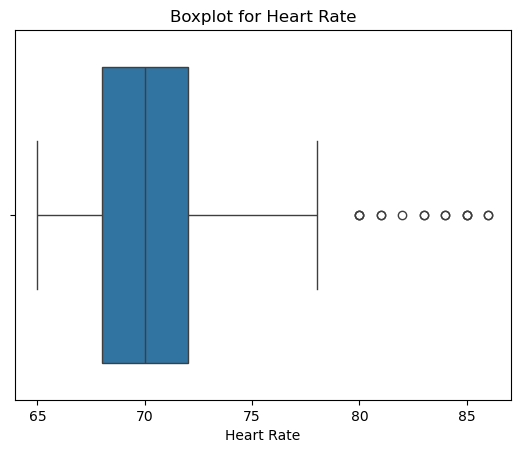

In [34]:
plot_boxplot(df,'Heart Rate')